In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imageio import imread
import sys

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
sys.path.insert(0, "../../project_2/src")

import NeuralNetwork

X shape =  (70000, 784)
y shape =  (70000,)


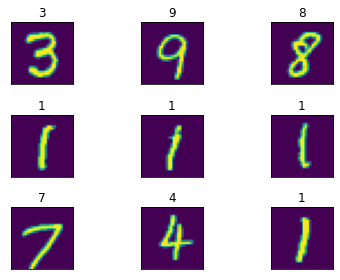

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])
plt.tight_layout()

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

y_train, labels = NeuralNetwork.FFNNClassifier.preprocess_classification_data(
    y_train, return_labels=True)

y_test = NeuralNetwork.FFNNClassifier.preprocess_classification_data(
    y_test, labels=labels)

X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

(56000, 784)
(56000,)


In [137]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x
    
    def train(self, X, y, epochs):
        optimizer = optim.Adam(net.parameters(), lr = 0.001)
        N = X.size()[0]
        
        for epoch in range(epochs):
            for i in range(N):
                optimizer.zero_grad()
                out = self(X[i].view(-1, 28*28))
                loss = F.mse_loss(output, y[i].view(-1, 10))
                loss.backward()
                optimizer.step()
            
            print(loss)
        return
    
    
net = Net()
print(net)

net.train(X_train, y_train, 1)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [151]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
    def train(self, X, y, epochs):
        optimizer = optim.Adam(net.parameters(), lr = 0.001)
        N = X.size()[0]
        
        for epoch in range(epochs):
            for i in range(N):
                optimizer.zero_grad()
                out = self(X[i])
                loss = F.mse_loss(output, y[i])
                loss.backward()
                optimizer.step()
            
            print(loss)
        return
    
    
net = Net()
print(net)


xt = torch.randn(10).view(-1, 1)
yt = xt**2

net.train(xt, yt, 1)

Net(
  (fc1): Linear(in_features=1, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
)


<ipython-input-151-34cd70891d05>:24: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(output, y[i])


RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.